In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO

# Load your custom YOLO model
model_path = r"E:\IITGN\mean_of_pixels\best.pt"
model = YOLO(model_path)

# Load the video
video_path = r"E:\IITGN\mean_of_pixels\exp_2\P01_4\thermal_rec_4.avi"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
print(fps)

# Output video writer
out = cv2.VideoWriter("output_video.avi", cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# Data storage
frame_numbers = []
mean_values = []

# Plot setup
plt.ion()
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 100)
ax.set_ylim(0, 255)
line, = ax.plot([], [], 'b-')  # Initialize an empty line plot

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model
    results = model(frame)

    mean_val = None  # Reset mean for each frame
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            conf = float(box.conf[0])  # Confidence score
            class_id = int(box.cls[0])  # Class ID
            class_name = model.names[class_id]  # Class name

            # Only process the "nostril" class
            if class_name == "nostril" and conf > 0.5:
                roi = frame[y1:y2, x1:x2]  # Extract nostril region
                mean_val = np.mean(roi)  # Compute mean pixel value

                # Draw bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"Nostril {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Store values if detection was made
    if mean_val is not None:
        frame_numbers.append(frame_count)
        mean_values.append(mean_val)
        print(f"Frame {frame_count}: Mean Pixel Value = {mean_val}")

    frame_count += 1

    # Update plot in real-time
    if len(frame_numbers) > 0:
        line.set_xdata(frame_numbers)
        line.set_ydata(mean_values)
        ax.relim()
        ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()

    # Show video with bounding boxes
    cv2.imshow("YOLOv8 Detection", frame)
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save data to CSV
df = pd.DataFrame({"Frame": frame_numbers, "Mean_Pixel_Value": mean_values})
df.to_csv("E:\IITGN\mean_of_pixels\exp_2\P01_2.csv", index=False)

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
plt.ioff()
plt.show()


25


FPS: 25

0: 960x1280 2 chests, 1 face, 1 nostril, 22.6ms
Speed: 17.3ms preprocess, 22.6ms inference, 27.1ms postprocess per image at shape (1, 3, 960, 1280)
Frame 0: Mean Pixel Value = 185.2935606060606

0: 960x1280 2 chests, 1 face, 1 nostril, 28.7ms
Speed: 26.1ms preprocess, 28.7ms inference, 9.5ms postprocess per image at shape (1, 3, 960, 1280)
Frame 1: Mean Pixel Value = 185.76363636363635

0: 960x1280 2 chests, 1 face, 1 nostril, 19.4ms
Speed: 18.8ms preprocess, 19.4ms inference, 1.9ms postprocess per image at shape (1, 3, 960, 1280)
Frame 2: Mean Pixel Value = 185.03636363636363

0: 960x1280 1 chest, 1 face, 1 nostril, 20.4ms
Speed: 18.5ms preprocess, 20.4ms inference, 2.0ms postprocess per image at shape (1, 3, 960, 1280)
Frame 3: Mean Pixel Value = 183.0

0: 960x1280 1 chest, 1 face, 1 nostril, 18.9ms
Speed: 20.2ms preprocess, 18.9ms inference, 3.0ms postprocess per image at shape (1, 3, 960, 1280)
Frame 4: Mean Pixel Value = 180.125

0: 960x1280 2 chests, 1 face, 1 nostril, 3

SystemError: <built-in function copyMakeBorder> returned a result with an error set

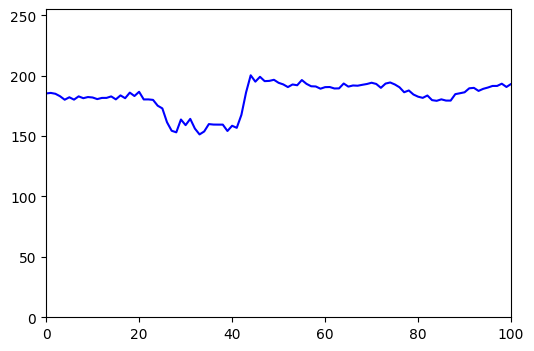

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO

# Load your custom YOLO model
model_path = r"E:\IITGN\mean_of_pixels\best.pt"
model = YOLO(model_path)

# Load the video
video_path = r"E:\IITGN\mean_of_pixels\exp_2\P01_3\thermal_rec_3.avi"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
print(f"FPS: {fps}")

# Output video writer
out = cv2.VideoWriter("output_video.avi", cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# Data storage
frame_numbers = []
mean_values = []

# Initialize previous mean pixel value
prev_mean_val = None  

# Plot setup
plt.ion()
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 100)
ax.set_ylim(0, 255)
line, = ax.plot([], [], 'b-')  # Initialize an empty line plot

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model
    results = model(frame)

    mean_val = None  # Reset mean for each frame
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            conf = float(box.conf[0])  # Confidence score
            class_id = int(box.cls[0])  # Class ID
            class_name = model.names[class_id]  # Class name

            # Only process the "nostril" class
            if class_name == "nostril" and conf > 0.5:
                roi = frame[y1:y2, x1:x2]  # Extract nostril region
                mean_val = np.mean(roi)  # Compute mean pixel value

                # Draw bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"Nostril {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # If no detection, use previous value
    if mean_val is None:
        if prev_mean_val is not None:
            mean_val = prev_mean_val  # Use previous frame's value
        else:
            mean_val = 0  # Default if no previous value exists

    # Store values
    frame_numbers.append(frame_count)
    mean_values.append(mean_val)
    prev_mean_val = mean_val  # Update previous value

    print(f"Frame {frame_count}: Mean Pixel Value = {mean_val}")

    frame_count += 1

    # Update plot in real-time
    if len(frame_numbers) > 0:
        line.set_xdata(frame_numbers)
        line.set_ydata(mean_values)
        ax.relim()
        ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()

    # Show video with bounding boxes
    cv2.imshow("YOLOv8 Detection", frame)
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save data to CSV
df = pd.DataFrame({"Frame": frame_numbers, "Mean_Pixel_Value": mean_values})
df.to_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_3\exp_3_mean_pixel_val.csv", index=False)

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
plt.ioff()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
df_pre=pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2_mean_pixel_values.csv")
df_gt=pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2.csv")

ex_2_pre_frame= df_pre["Frame"].values
ex_2_pre_mean=df_pre["Mean_Pixel_Value"].values
ex_2_gt_time=df_gt["Data Set 1:Time(s)"].values
ex_2_gt_force=df_gt["Data Set 1:Force(N)"].values

print(ex_2_gt_time)
print(ex_2_gt_force)

print(len(ex_2_gt_force))
print(len(ex_2_gt_time))
print(len(ex_2_pre_frame))
print(len(ex_2_pre_mean))


# print(df_gt)



In [ ]:
# from scipy.interpolate import interp1d

# # Interpolate chest signal to match nostril signal's time axis
# interp_chest = interp1d(ex_2_gt_time, ex_2_gt_force, kind='linear', fill_value="extrapolate")
# band_passed_1_interp = interp_chest(ex_2_gt_time)

# print(len(band_passed_1_interp))
# print()


In [3]:
import pandas as pd
import pandas as pd
import numpy as np

df_pre=pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2_mean_pixel_values.csv")
df_gt=pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2.csv")


chest_resp = df_gt[["Data Set 1:Time(s)", "Data Set 1:Force(N)"]]
chest_resp.columns = ['Time', 'Force']

# Convert 'Time' to datetime format
chest_resp['Time'] = pd.to_timedelta(chest_resp['Time'], unit='s')

# Set 'Time' as the index
chest_resp.set_index('Time', inplace=True)

# Resample at 0.04s intervals and interpolate
chest_resp = chest_resp.resample('40L').interpolate(method='linear')  # '40L' means 40 milliseconds
print(chest_resp)
# print(chest_resp.dtype)

#SAVE 
# df.to_csv(


                           Force
Time                            
0 days 00:00:00         9.433060
0 days 00:00:00.040000  9.098866
0 days 00:00:00.080000  8.764673
0 days 00:00:00.120000  8.430479
0 days 00:00:00.160000  8.096286
...                          ...
0 days 00:08:59.880000  9.397801
0 days 00:08:59.920000  9.399333
0 days 00:08:59.960000  9.400865
0 days 00:09:00         9.402397
0 days 00:09:00.040000  9.402397

[13502 rows x 1 columns]


C:\Users\gajen\AppData\Local\Temp\ipykernel_26724\3929925932.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_resp['Time'] = pd.to_timedelta(chest_resp['Time'], unit='s')
C:\Users\gajen\AppData\Local\Temp\ipykernel_26724\3929925932.py:19: FutureWarning: 'L' is deprecated and will be removed in a future version, please use 'ms' instead.
  chest_resp = chest_resp.resample('40L').interpolate(method='linear')  # '40L' means 40 milliseconds


In [43]:
import pandas as pd

# Read data
df_gt = pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2.csv")

# Extract Time and Force columns
chest_resp = df_gt[["Data Set 1:Time(s)", "Data Set 1:Force(N)"]]
chest_resp.columns = ['Time', 'Force']
print(type(chest_resp))
# print(chest_resp.head())

# Set 'Time' as index
chest_resp.set_index('Time', inplace=True)
# print(chest_resp.index)
# print(chest_resp.head())


# Find total duration
total_duration = chest_resp.index[-1] - chest_resp.index[0]  # Last time - First time

# Calculate new interval
num_points_new = 12971

new_interval = total_duration / (num_points_new - 1) # Time difference needed per step
print(new_interval)

# Create new time index with equal intervals
new_time_index = np.arange(0,chest_resp.index[-1],new_interval)

chest_resp= chest_resp.reindex(new_time_index).interpolate(method='linear') 

print(chest_resp)
chest_resp.to_csv("kkkkkkkkkkkkk.csv",index=False)





<class 'pandas.core.frame.DataFrame'>
0.041638396299151885
              Force
Time               
0.000000    9.43306
0.041638    9.43306
0.083277    9.43306
0.124915    9.43306
0.166554    9.43306
...             ...
539.841808  9.43306
539.883446  9.43306
539.925085  9.43306
539.966723  9.43306
540.008362  9.43306

[12970 rows x 1 columns]


In [42]:
import pandas as pd
import numpy as np

# Read data
df_gt = pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2.csv")

# Extract Time and Force columns
chest_resp = df_gt[["Data Set 1:Time(s)", "Data Set 1:Force(N)"]]
chest_resp.columns = ['Time', 'Force']

# Convert 'Time' to float (if not already)
chest_resp['Time'] = chest_resp['Time'].astype(float)

# Set 'Time' as index
chest_resp.set_index('Time', inplace=True)

# Find total duration
total_duration = chest_resp.index[-1] - chest_resp.index[0]

# Calculate new interval
num_points_new = 12971
new_interval = total_duration / (num_points_new - 1)  # Time difference needed per step
print(f"New Interval: {new_interval}")

# Create new time index with equal intervals
new_time_index = np.linspace(chest_resp.index[0], chest_resp.index[-1], num_points_new)
# Interpolate using new time index
chest_resp = chest_resp.reindex(new_time_index, method=None).interpolate(method='linear')
print(chest_resp.head())

# Save to CSV (keeping index)
chest_resp_resampled.to_csv("resampled_data.csv", index=True)

print(chest_resp_resampled)


New Interval: 0.041638396299151885
             Force
Time              
0.000000  9.433060
0.041638  9.433059
0.083277  9.433057
0.124915  9.433056
0.166554  9.433055
               Force
Time                
0.000000    9.433060
0.041638    9.433059
0.083277    9.433057
0.124915    9.433056
0.166554    9.433055
...              ...
539.883446  9.417737
539.925085  9.417736
539.966723  9.417735
540.008362  9.417733
540.050000  9.417732

[12971 rows x 1 columns]


C:\Users\gajen\AppData\Local\Temp\ipykernel_26724\3494220698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_resp['Time'] = chest_resp['Time'].astype(float)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path =r"E:\IITGN\mean_of_pixels\exp_2\ex_2_gt - Sheet1.csv"
dff = pd.read_csv(csv_path)

dff.set_index('Time(s)', inplace=True)  # Set 'Time' as the index   dff["Time(s)"], dff["Force(N)"]

new_index = np.arange(0, dff.index[-1], 0.04)  # Create a new time index with intervals of 0.04

dff = dff.reindex(new_index).interpolate(method='linear') 

print(dff)
dff.to_csv('gt_chest_resp.csv')

         Force(N)
Time(s)          
0.00     9.433060
0.04     9.098866
0.08     8.764673
0.12     8.430479
0.16     8.096286
...           ...
539.88   9.397801
539.92   9.399333
539.96   9.400865
540.00   9.402397
540.04   9.402397

[13502 rows x 1 columns]


In [8]:
import pandas as pd

# Load data
belt_data = pd.read_csv(r"E:\IITGN\mean_of_pixels\exp_2\P01_2\exp_2.csv")

# Extract relevant columns
chest_resp = belt_data.iloc[:, -3:-1]
chest_resp.columns = ['Time', 'Force']

# Convert 'Time' to datetime format
chest_resp['Time'] = pd.to_timedelta(chest_resp['Time'], unit='s')

# Set 'Time' as the index
chest_resp.set_index('Time', inplace=True)

# Resample at 0.04s intervals and interpolate
chest_resp = chest_resp.resample('30L').interpolate(method='linear')  # '40L' means 40 milliseconds
print(chest_resp)


                           Force
Time                            
0 days 00:00:00         9.433060
0 days 00:00:00.030000  9.138213
0 days 00:00:00.060000  8.843365
0 days 00:00:00.090000  8.548518
0 days 00:00:00.120000  8.253671
...                          ...
0 days 00:08:59.910000  9.411598
0 days 00:08:59.940000  9.408531
0 days 00:08:59.970000  9.405464
0 days 00:09:00         9.402397
0 days 00:09:00.030000  9.402397

[18002 rows x 1 columns]


C:\Users\gajen\AppData\Local\Temp\ipykernel_26724\1786943206.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_resp['Time'] = pd.to_timedelta(chest_resp['Time'], unit='s')
C:\Users\gajen\AppData\Local\Temp\ipykernel_26724\1786943206.py:17: FutureWarning: 'L' is deprecated and will be removed in a future version, please use 'ms' instead.
  chest_resp = chest_resp.resample('30L').interpolate(method='linear')  # '40L' means 40 milliseconds


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Initialize the video capture object
cap_Ap_01 = cv2.VideoCapture(r"E:\IITGN\mean_of_pixels\exp\output_video.avi")

# Check if the video was opened successfully
if not cap_Ap_01.isOpened():
    print("Error: Could not open video file.")
else:
    print("Video file opened successfully!")

# while cap_Ap_01.isOpened():
#     ret, frame = cap_Ap_01.read()
    
#     if not ret:  # Check if a frame was returned
#         print("End of video or error occurred.")
#         break

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     # Display the grayscale frame
#     cv2.imshow('frame', gray)
    
#     # Exit on key press 'q'
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release resources
# cap_Ap_01.release()
# cv2.destroyAllWindows()


Video file opened successfully!


KeyboardInterrupt: 

: 

In [2]:
import os

# Base path where folders will be created
base_path = 'E:/100_folder'  # Change this to your desired path

# Create 100 folders named Folder_1 to Folder_100
for i in range(1,98):
    folder_name = f'AP_{i}'
    folder_path = os.path.join(base_path, folder_name)
    
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

print("100 folders created successfully!")


100 folders created successfully!


In [ ]:
import cv2
import numpy as np
import os

# 🔹 Path to your folder with frames
input_folder = r'E:\IITGN\mean_of_pixels\frame_extraction_algo\input'
output_folder = r'E:\IITGN\mean_of_pixels\frame_extraction_algo\output'
# os.makedirs(output_folder, exist_ok=True)

# 🔹 Load all image files
image_files = sorted([
    f for f in os.listdir(input_folder)
    if f.endswith(('.png', '.jpg', '.jpeg'))
])

frames = []
for filename in image_files:
    path = os.path.join(input_folder, filename)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # or IMREAD_COLOR if needed
    if img is not None:
        frames.append(img)

# 🔹 Store unique frames only
unique_frames = []
unique_indices = []  # To track original index

for i, frame in enumerate(frames):
    is_duplicate = False
    for u_frame in unique_frames:
        if np.array_equal(frame, u_frame):
            is_duplicate = True
            break
    if not is_duplicate:
        unique_frames.append(frame)
        unique_indices.append(i)

# 🔹 Save unique frames (optional)
for idx, frame in zip(unique_indices, unique_frames):
    filename = f'unique_frame_{idx}.png'
    save_path = os.path.join(output_folder, filename)
    cv2.imwrite(save_path, frame)

print(f"Loaded {len(frames)} frames.")
print(f"Stored {len(unique_frames)} unique frames in '{output_folder}' ✅")


In [19]:
import cv2
import os

# Path to your video file
video_path = r"E:\IITGN\mean_of_pixels\exp\output_video.avi"

# Folder to save extracted frames
# output_folder = "/path/to/save/frames"
# os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture(video_path)

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break  # End of video
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # Save each frame
    # frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.png")
    # cv2.imwrite(frame_filename, gray_frame)
    frame_count += 1

cap.release()
print(f"✅ Extracted {frame_count} frames and saved in:")
print(gray_frame)
print(gray_frame.shape)



✅ Extracted 1372 frames and saved in:
[[38 37 37 ... 42 42 42]
 [37 37 36 ... 42 42 42]
 [37 36 36 ... 42 42 42]
 ...
 [18 18 18 ... 24 24 24]
 [19 19 19 ... 24 24 24]
 [19 19 19 ... 25 25 25]]
(192, 256)


In [ ]:
import cv2
import os
import numpy as np

# Path to your video file
video_path = r"E:\IITGN\mean_of_pixels\exp\output_video.avi"

# Folder to save extracted frames
output_folder = "/path/to/save/frames"
# os.makedirs(output_folder, exist_ok=True)

# Load the video
cap = cv2.VideoCapture(video_path)

frame_count = 0
frames_array = []

while True:
    ret, frame = cap.read()
    if not ret:
        break  # End of video
    
    # Save each frame
    frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.png")
    # cv2.imwrite(frame_filename, frame)
    
    # Store frame in array
    frames_array.append(frame)
    
    frame_count += 1

cap.release()

# Calculate mean of each frame
frame_means = [np.mean(frame) for frame in frames_array]

print(f"✅ Extracted {frame_count} frames and saved in: {output_folder}")
print(f"Mean of each frame: {frame_means}")

original_list = frame_means#[28, 29, 35, 27, 35,30,36,40,43,24,25]
filtered_list = []#store only that value that having differnce between 2 or greater between them

for num in original_list:
    if all(abs(num - x) > 1 for x in filtered_list):
        filtered_list.append(num)

print(filtered_list)
print(len(filtered_list))


✅ Extracted 1372 frames and saved in: /path/to/save/frames
Mean of each frame: [36.945400661892364, 36.931905110677086, 36.9051513671875, 36.823323567708336, 36.737569173177086, 36.78929307725694, 36.71270073784722, 36.769246419270836, 36.79572211371528, 36.56488037109375, 36.719150119357636, 36.662699381510414, 36.743197970920136, 36.69043646918403, 36.899515787760414, 36.967427571614586, 37.190402560763886, 37.24822319878472, 37.492940266927086, 37.55634901258681, 37.703450520833336, 37.92840576171875, 38.302402072482636, 38.64814588758681, 39.32933892144097, 39.54058159722222, 39.59173583984375, 39.77788628472222, 40.039401584201386, 40.140401204427086, 40.35582817925347, 40.40446641710069, 40.37019178602431, 40.515055338541664, 40.47209337022569, 40.42292616102431, 40.451327853732636, 40.44856092664931, 40.37043592664931, 40.228976779513886, 40.04760064019097, 40.08399793836806, 40.585238986545136, 39.69086371527778, 39.31684705946181, 39.117892795138886, 38.659389919704864, 38.406

In [ ]:
# import cv2
# import numpy as np
# import os

# # Paths
# input_folder = r'E:\IITGN\mean_of_pixels\frame_extraction_algo\input'
# output_folder = r'E:\IITGN\mean_of_pixels\frame_extraction_algo\output'
# # os.makedirs(output_folder, exist_ok=True)

# # Load image files
# image_files = sorted([
#     f for f in os.listdir(input_folder)
#     if f.endswith(('.png', '.jpg', '.jpeg'))
# ])

# frames = []
# for filename in image_files:
#     path = os.path.join(input_folder, filename)
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     if img is not None:
#         frames.append(img)

# # Initialize variables
# prev_frame = None
# unique_frames = []
# threshold =2
# unique_count = 0

# print(len(frames))


3


In [ ]:
# import cv2
# import os
# import numpy as np

# # Path to your video file
# video_path = r"E:\IITGN\mean_of_pixels\frame_extraction_algo\Frag_1.avi"

# # Folder to save filtered frames
# output_folder = r"E:\IITGN\mean_of_pixels\frame_extraction_algo\output_folder"
# os.makedirs(output_folder, exist_ok=True)

# # Load the video
# cap = cv2.VideoCapture(video_path)

# frame_count = 0
# frames_array = []
# frame_means = []

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break  # End of video
    
#     # Calculate mean of the frame and store it
#     frame_mean = np.mean(frame)
#     frame_means.append(frame_mean)
    
#     # Store frame in array with its index for later use
#     frames_array.append((frame_count, frame))
    
#     frame_count += 1

# cap.release()

# # Filtered list logic: Keep only means with differences greater than 1
# filtered_list = []
# for num in frame_means:
#     if all(abs(num - x) > 1 for x in filtered_list):
#         filtered_list.append(num)

# # Save frames corresponding to filtered means
# saved_frame_count = 0
# for i, mean in enumerate(frame_means):
#     if mean in filtered_list:
#         frame_index, frame = frames_array[i]
#         frame_filename = os.path.join(output_folder, f"filtered_frame_{frame_index:04d}.png")
#         cv2.imwrite(frame_filename, frame)
#         saved_frame_count += 1

# print(f"✅ Extracted {frame_count} frames.")
# print(f"✅ Filtered {len(filtered_list)} unique mean values: {filtered_list}")
# print(f"✅ Saved {saved_frame_count} filtered frames to: {output_folder}")


✅ Extracted 1301 frames.
✅ Filtered 7 unique mean values: [43.04090033637153, 47.04059516059028, 48.05443657769097, 45.641459147135414, 44.480733235677086, 42.03691270616319, 40.51860215928819]
✅ Saved 7 filtered frames to: E:\IITGN\mean_of_pixels\frame_extraction_algo\output_folder


In [30]:
import cv2
import os
import numpy as np

# Configuration
video_path = r"E:\IITGN\mean_of_pixels\frame_extraction_algo\Frag_1.avi"
output_folder = r"E:\IITGN\mean_of_pixels\frame_extraction_algo\output_folder"
os.makedirs(output_folder, exist_ok=True)
threshold = 300000# Minimum number of changed pixels to consider as unique frame
pixel_diff_threshold = 10  # Pixel intensity change threshold

# Initialize video capture
cap = cv2.VideoCapture(video_path)
prev_frame = None
unique_count = 0
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if prev_frame is not None:
        # Compute absolute difference between frames
        diff = cv2.absdiff(prev_frame, gray_frame)
        diff_count = np.count_nonzero(diff > pixel_diff_threshold)

        # Save frame if significant changes detected
        if diff_count > threshold:
            unique_count += 1
            output_path = os.path.join(
                output_folder, 
                f"AP_3000_Feag_{frame_count}_frame_{unique_count}.png"
            )
            cv2.imwrite(output_path, frame)
            print(f"🔥 Saved unique frame {unique_count} (Diff: {diff_count} pixels)")

    # Update previous frame for next iteration
    prev_frame = gray_frame.copy()
    frame_count += 1

cap.release()
print(f"\n✅ Processing complete!")
print(f"Total frames analyzed: {frame_count}")
print(f"Unique frames saved: {unique_count}")
# print(f"Output directory: {output_folder}")



✅ Processing complete!
Total frames analyzed: 1301
Unique frames saved: 0


In [25]:
original_list = frame_means#[28, 29, 35, 27, 35,30,36,40,43,24,25]
filtered_list = []#store only that value that having differnce between 2 or greater between them

for num in original_list:
    if all(abs(num - x) > 1 for x in filtered_list):
        filtered_list.append(num)

print(filtered_list)
print(len(filtered_list))


[36.945400661892364, 38.302402072482636, 39.32933892144097, 40.35582817925347, 35.78858100043403, 34.661478678385414, 33.568990071614586, 32.549465603298614, 41.776211208767364, 44.73474799262153, 48.629414876302086, 50.573337131076386, 47.3890380859375, 45.85661485460069, 43.72815619574653]
15
